In [31]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [13]:
raw_data=pd.read_csv("Absenteeism_data.csv")

In [18]:
data=raw_data.copy()

In [131]:
len(data['Reason for Absence'].unique())

28

In [133]:
data.value_counts('Reason for Absence')

Reason for Absence
23    147
28    110
27     66
13     52
0      38
19     36
22     32
26     31
25     29
11     24
10     22
18     21
14     18
1      16
7      13
12      8
6       6
21      6
8       5
9       4
24      3
5       3
16      3
15      2
4       2
3       1
17      1
2       1
dtype: int64

In [140]:
data_abs_summ=data.groupby('Reason for Absence')['Absenteeism Time in Hours'].agg([np.sum,np.min,np.max])

In [143]:
data_abs_summ.sort_values('sum',ascending=False)

sum  amin  amax
Reason for Absence                 
13                  757     1   120
19                  692     1   104
23                  420     1    16
28                  329     1    24
11                  292     1   120
10                  257     2    48
22                  242     3     8
26                  228     4    16
18                  217     1    80
12                  187     1   112
1                   182     1    64
9                   168     8   112
14                  159     2    40
27                  150     0     3
7                   134     1    40
25                   97     1     8
6                    43     3     8
21                   35     1     8
8                    30     3     8
24                   24     8     8
2                    24    24    24
5                    19     3     8
15                   16     8     8
4                     9     1     8
17                    8     8     8
3                     8     8     8
16                    6     1     3
0                     0     0     0

In [172]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [59]:
data

ID  Reason for Absence        Date  Transportation Expense  \
0    11                  26  07/07/2015                     289   
1    36                   0  14/07/2015                     118   
2     3                  23  15/07/2015                     179   
3     7                   7  16/07/2015                     279   
4    11                  23  23/07/2015                     289   
5     3                  23  10/07/2015                     179   
6    10                  22  17/07/2015                     361   
7    20                  23  24/07/2015                     260   
8    14                  19  06/07/2015                     155   
9     1                  22  13/07/2015                     235   
10   20                   1  20/07/2015                     260   
11   20                   1  14/07/2015                     260   
12   20                  11  15/07/2015                     260   
13    3                  11  15/07/2015                     179   
14    3                  23  15/07/2015                     179   
15   24                  14  17/07/2015                     246   
16    3                  23  17/07/2015                     179   
17    3                  21  27/07/2015                     179   
18    6                  11  30/07/2015                     189   
19   33                  23  05/08/2015                     248   
20   18                  10  12/08/2015                     330   
21    3                  11  03/08/2015                     179   
22   10                  13  10/08/2015                     361   
23   20                  28  14/08/2015                     260   
24   11                  18  17/08/2015                     289   
25   10                  25  24/08/2015                     361   
26   11                  23  04/08/2015                     289   
27   30                  28  12/08/2015                     157   
28   11                  18  19/08/2015                     289   
29    3                  23  28/08/2015                     179   
30    3                  18  17/08/2015                     179   
31    2                  18  27/08/2015                     235   
32    1                  23  27/08/2015                     235   
33    2                  18  17/08/2015                     235   
34    3                  23  17/08/2015                     179   
35   10                  23  17/08/2015                     361   
36   11                  24  04/08/2015                     289   
37   19                  11  20/08/2015                     291   
38    2                  28  21/08/2015                     235   
39   20                  23  28/08/2015                     260   
40   27                  23  01/09/2015                     184   
41   34                  23  07/09/2015                     118   
42    3                  23  01/09/2015                     179   
43    5                  19  08/09/2015                     235   
44   14                  23  09/09/2015                     155   
45   34                  23  13/09/2015                     118   
46    3                  23  14/09/2015                     179   
47   15                  23  24/09/2015                     291   
48   20                  22  04/09/2015                     260   
49   15                  14  14/09/2015                     291   
50   20                   0  21/09/2015                     260   
51   29                   0  28/09/2015                     225   
52   28                  23  08/09/2015                     225   
53   34                  23  15/09/2015                     118   
54   11                   0  22/09/2015                     289   
55   36                   0  29/09/2015                     118   
56   28                  18  16/09/2015                     225   
57    3                  23  23/09/2015                     179   
58   13                   0  30/09/2015             

In [43]:
data.head()

ID  Reason for Absence        Date  Transportation Expense  \
0  11                  26  07/07/2015                     289   
1  36                   0  14/07/2015                     118   
2   3                  23  15/07/2015                     179   
3   7                   7  16/07/2015                     279   
4  11                  23  23/07/2015                     289   

   Distance to Work  Age  Daily Work Load Average  Body Mass Index  Education  \
0                36   33                  239.554               30          1   
1                13   50                  239.554               31          1   
2                51   38                  239.554               31          1   
3                 5   39                  239.554               24          1   
4                36   33                  239.554               30          1   

   Children  Pets  Absenteeism Time in Hours  
0         2     1                          4  
1         1     0                          0  
2         0     0                          2  
3         2     0                          4  
4         2     1                          2

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


(array([0.11059908, 0.04423963, 0.0156682 , 0.0562212 , 0.02488479,
        0.04516129, 0.06451613, 0.11059908, 0.05069124, 0.03133641,
        0.02119816, 0.        , 0.02304147, 0.00460829, 0.03686636,
        0.        , 0.        , 0.        , 0.        , 0.00552995]),
 array([27.  , 28.55, 30.1 , 31.65, 33.2 , 34.75, 36.3 , 37.85, 39.4 ,
        40.95, 42.5 , 44.05, 45.6 , 47.15, 48.7 , 50.25, 51.8 , 53.35,
        54.9 , 56.45, 58.  ]),
 <BarContainer object of 20 artists>)

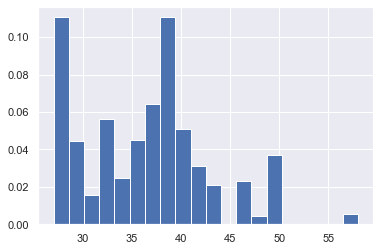

In [38]:
plt.hist(data['Age'],density=True,bins=20)

In [78]:
id_total_absent=data.groupby('ID')['Absenteeism Time in Hours'].sum()

In [79]:
type(id_total_absent)

pandas.core.series.Series

<AxesSubplot:xlabel='ID'>

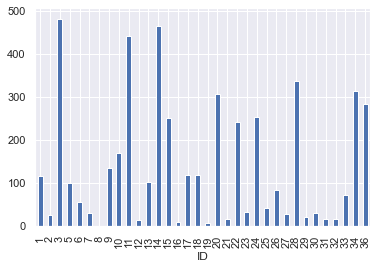

In [46]:
id_total_absent.plot(kind="bar")

In [52]:
len(id_total_absent[id_total_absent>100])

16

In [53]:
data.head()

ID  Reason for Absence        Date  Transportation Expense  \
0  11                  26  07/07/2015                     289   
1  36                   0  14/07/2015                     118   
2   3                  23  15/07/2015                     179   
3   7                   7  16/07/2015                     279   
4  11                  23  23/07/2015                     289   

   Distance to Work  Age  Daily Work Load Average  Body Mass Index  Education  \
0                36   33                  239.554               30          1   
1                13   50                  239.554               31          1   
2                51   38                  239.554               31          1   
3                 5   39                  239.554               24          1   
4                36   33                  239.554               30          1   

   Children  Pets  Absenteeism Time in Hours  
0         2     1                          4  
1         1     0                          0  
2         0     0                          2  
3         2     0                          4  
4         2     1                          2

In [58]:
data.groupby(["ID","Age"])["Absenteeism Time in Hours"].sum()

ID  Age
1   37     117
2   48      25
3   38     482
5   43     100
6   33      56
7   39      30
8   39       0
9   58     134
10  28     170
11  33     442
12  31      13
13  31     103
14  34     466
15  40     251
16  46       8
17  40     118
18  28     118
19  32       6
20  36     306
21  33      16
22  30     241
23  36      32
24  41     254
25  32      42
26  43      83
27  27      27
28  28     338
29  28       0
    41      21
30  29      31
31  50      16
32  49      16
33  47      73
34  37     314
36  50     284
Name: Absenteeism Time in Hours, dtype: int64

In [62]:

data[data['ID']==29]

ID  Reason for Absence        Date  Transportation Expense  \
51   29                   0  28/09/2015                     225   
592  29                  28  09/02/2018                     225   
675  29                  19  09/05/2018                     225   
681  29                  14  10/05/2018                     225   
683  29                  22  11/05/2018                     225   

     Distance to Work  Age  Daily Work Load Average  Body Mass Index  \
51                 26   28                  241.476               24   
592                15   41                  264.249               28   
675                15   41                  237.656               28   
681                15   41                  237.656               28   
683                15   41                  237.656               28   

     Education  Children  Pets  Absenteeism Time in Hours  
51           1         1     2                          0  
592          4         2     2                          2  
675          4         2     2                          3  
681          4         2     2                          8  
683          4         2     2                          8

In [63]:
data.head()

ID  Reason for Absence        Date  Transportation Expense  \
0  11                  26  07/07/2015                     289   
1  36                   0  14/07/2015                     118   
2   3                  23  15/07/2015                     179   
3   7                   7  16/07/2015                     279   
4  11                  23  23/07/2015                     289   

   Distance to Work  Age  Daily Work Load Average  Body Mass Index  Education  \
0                36   33                  239.554               30          1   
1                13   50                  239.554               31          1   
2                51   38                  239.554               31          1   
3                 5   39                  239.554               24          1   
4                36   33                  239.554               30          1   

   Children  Pets  Absenteeism Time in Hours  
0         2     1                          4  
1         1     0                          0  
2         0     0                          2  
3         2     0                          4  
4         2     1                          2

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


In [66]:
data['Date']=pd.to_datetime(data['Date'])

In [70]:
data_date_index=data.set_index('Date').sort_index()

In [71]:
data_date_index

ID  Reason for Absence  Transportation Expense  Distance to Work  \
Date                                                                           
2015-01-09  27                  23                     184                42   
2015-01-09   3                  23                     179                51   
2015-01-12  33                  23                     248                25   
2015-01-12  34                  19                     118                10   
2015-02-11  14                  10                     155                12   
2015-02-11  33                  28                     248                25   
2015-02-12  36                  23                     118                13   
2015-02-12   1                  26                     235                11   
2015-03-08   3                  11                     179                51   
2015-03-12  28                  23                     225                26   
2015-04-08  11                  24                     289                36   
2015-04-08  11                  23                     289                36   
2015-04-09  20                  22                     260                50   
2015-04-11  28                  23                     225                26   
2015-04-12  20                  26                     260                50   
2015-05-08  33                  23                     248                25   
2015-05-11   3                  23                     179                51   
2015-05-11   3                  13                     179                51   
2015-06-07  14                  19                     155                12   
2015-06-10  34                  23                     118                10   
2015-06-10   3                  23                     179                51   
2015-07-07  11                  26                     289                36   
2015-07-09  34                  23                     118                10   
2015-07-13   1                  22                     235                11   
2015-07-14  20                   1                     260                50   
2015-07-14  36                   0                     118                13   
2015-07-15   3                  23                     179                51   
2015-07-15  20                  11                     260                50   
2015-07-15   3                  11                     179                51   
2015-07-15   3                  23                     179                51   
2015-07-16   7                   7                     279                 5   
2015-07-17  10                  22                     361                52   
2015-07-17  24                  14                     246                25   
2015-07-17   3                  23                     179                51   
2015-07-20  20                   1                     260                50   
2015-07-23  11                  23                     289                36   
2015-07-24  20                  23                     260                50   
2015-07-27   3                  21                     179                51   
2015-07-30   6                  11                     189                29   
2015-08-09   5                  19                     235                20   
2015-08-09  28                  23                     225                26   
2015-08-12  34                  19                     118                10   
2015-08-14  20                  28                     260                50   
2015-08-17   2                  18                     235                29   
2015-08-17  10                  23                     361                52   
2015-08-17  11                  18                     289                36   
2015-08-17   3                  18                     179                51   
2015-08-17   3                  23                     179                51   
2015-08-19  

In [72]:
data_date_index.loc["2015":"2018"]

ID  Reason for Absence  Transportation Expense  Distance to Work  \
Date                                                                           
2015-01-09  27                  23                     184                42   
2015-01-09   3                  23                     179                51   
2015-01-12  33                  23                     248                25   
2015-01-12  34                  19                     118                10   
2015-02-11  14                  10                     155                12   
2015-02-11  33                  28                     248                25   
2015-02-12  36                  23                     118                13   
2015-02-12   1                  26                     235                11   
2015-03-08   3                  11                     179                51   
2015-03-12  28                  23                     225                26   
2015-04-08  11                  24                     289                36   
2015-04-08  11                  23                     289                36   
2015-04-09  20                  22                     260                50   
2015-04-11  28                  23                     225                26   
2015-04-12  20                  26                     260                50   
2015-05-08  33                  23                     248                25   
2015-05-11   3                  23                     179                51   
2015-05-11   3                  13                     179                51   
2015-06-07  14                  19                     155                12   
2015-06-10  34                  23                     118                10   
2015-06-10   3                  23                     179                51   
2015-07-07  11                  26                     289                36   
2015-07-09  34                  23                     118                10   
2015-07-13   1                  22                     235                11   
2015-07-14  20                   1                     260                50   
2015-07-14  36                   0                     118                13   
2015-07-15   3                  23                     179                51   
2015-07-15  20                  11                     260                50   
2015-07-15   3                  11                     179                51   
2015-07-15   3                  23                     179                51   
2015-07-16   7                   7                     279                 5   
2015-07-17  10                  22                     361                52   
2015-07-17  24                  14                     246                25   
2015-07-17   3                  23                     179                51   
2015-07-20  20                   1                     260                50   
2015-07-23  11                  23                     289                36   
2015-07-24  20                  23                     260                50   
2015-07-27   3                  21                     179                51   
2015-07-30   6                  11                     189                29   
2015-08-09   5                  19                     235                20   
2015-08-09  28                  23                     225                26   
2015-08-12  34                  19                     118                10   
2015-08-14  20                  28                     260                50   
2015-08-17   2                  18                     235                29   
2015-08-17  10                  23                     361                52   
2015-08-17  11                  18                     289                36   
2015-08-17   3                  18                     179                51   
2015-08-17   3                  23                     179                51   
2015-08-19  

In [84]:
date_absent=data.groupby('Date')["Absenteeism Time in Hours"].agg([np.max,np.min,np.median,np.mean,np.sum])

In [85]:
date_absent

amax  amin  median        mean  sum
Date                                           
2015-01-09     4     2     3.0    3.000000    6
2015-01-12    64     1    32.5   32.500000   65
2015-02-11    32     1    16.5   16.500000   33
2015-02-12     8     2     5.0    5.000000   10
2015-03-08     1     1     1.0    1.000000    1
2015-03-12     2     2     2.0    2.000000    2
2015-04-08     8     1     4.5    4.500000    9
2015-04-09     8     8     8.0    8.000000    8
2015-04-11     1     1     1.0    1.000000    1
2015-04-12     8     8     8.0    8.000000    8
2015-05-08     2     2     2.0    2.000000    2
2015-05-11     8     1     4.5    4.500000    9
2015-06-07    40    40    40.0   40.000000   40
2015-06-10     3     3     3.0    3.000000    6
2015-07-07     4     4     4.0    4.000000    4
2015-07-09     4     4     4.0    4.000000    4
2015-07-13     8     8     8.0    8.000000    8
2015-07-14     8     0     4.0    4.000000    8
2015-07-15     8     1     3.0    3.750000   15
2015-07-16     4     4     4.0    4.000000    4
2015-07-17     8     2     8.0    6.000000   18
2015-07-20     8     8     8.0    8.000000    8
2015-07-23     2     2     2.0    2.000000    2
2015-07-24     4     4     4.0    4.000000    4
2015-07-27     8     8     8.0    8.000000    8
2015-07-30     8     8     8.0    8.000000    8
2015-08-09     8     2     5.0    5.000000   10
2015-08-12    56    56    56.0   56.000000   56
2015-08-14     4     4     4.0    4.000000    4
2015-08-17     8     1     8.0    5.400000   27
2015-08-19     8     8     8.0    8.000000    8
2015-08-20     4     4     4.0    4.000000    4
2015-08-21     8     8     8.0    8.000000    8
2015-08-24     7     7     7.0    7.000000    7
2015-08-27     8     4     6.0    6.000000   12
2015-08-28     4     2     3.0    3.000000    6
2015-09-09     2     2     2.0    2.000000    2
2015-09-11     8     8     8.0    8.000000    8
2015-09-12     8     8     8.0    8.000000    8
2015-09-13     3     3     3.0    3.000000    3
2015-09-14    32     3    17.5   17.500000   35
2015-09-15     2     2     2.0    2.000000    2
2015-09-16     3     3     3.0    3.000000    3
2015-09-18     3     3     3.0    3.000000    3
2015-09-21     0     0     0.0    0.000000    0
2015-09-22     0     0     0.0    0.000000    0
2015-09-23     3     3     3.0    3.000000    3
2015-09-24     4     4     4.0    4.000000    4
2015-09-25     4     4     4.0    4.000000    4
2015-09-28     0     0     0.0    0.000000    0
2015-09-29     0     0     0.0    0.000000    0
2015-09-30     0     0     0.0    0.000000    0
2015-10-07     2     2     2.0    2.000000    2
2015-10-08    40    40    40.0   40.000000   40
2015-10-11     3     3     3.0    3.000000    3
2015-10-12     3     3     3.0    3.000000    3
2015-10-13     8     3     5.5    5.500000   11
2015-10-14     2     0     1.0    1.000000    2
2015-10-15     1     1     1.0    1.000000    1
2015-10-16     3     3     3.0    3.000000    6
2015-10-20     2     2     2.0    2.000000    2
2015-10-21     8     2     5.5    5.250000   21
2015-10-22    16     5    10.5   10.500000   21
2015-10-23     1     1     1.0    1.000000    1
2015-10-30     3     3     3.0    3.000000    3
2015-11-09     1     1     1.0    1.000000    1
2015-11-11    24    24    24.0   24.000000   24
2015-11-12     3     2     2.5    2.500000    5
2015-11-16    40    40    40.0   40.000000   40
2015-11-18     3     1     2.0    2.000000    4
2015-11-19     5     5     5.0    5.000000    5
2015-11-20     8     3     5.5    5.500000   11
2015-11-25     8     8     8.0    8.000000    8
2015-11-26     3     3     3.0    3.000000    3
2015-11-27     4     4     4.0    4.000000    4
2015-12-08     8     4     6.0    6.000000   12
2015-12-11     8     8     8.0    8.000000    8
2015-12-15     2     2     2.0    2.000000    2
2015-12-16     8     8     8.0    8.000000    8
2015-12-18     8     2     5.0    5.000000   10
2016-01-03     8     2     5.0    5.000000   10
2016-01-13     2     2     2

<AxesSubplot:>

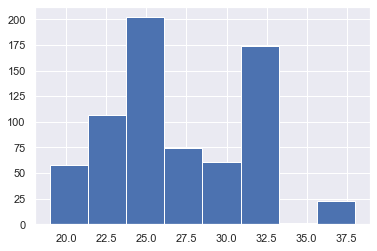

In [89]:
data["Body Mass Index"].hist(bins=8)

In [102]:
data_bmi_absent=data.groupby("Body Mass Index")["Absenteeism Time in Hours"].sum()

<AxesSubplot:xlabel='Body Mass Index'>

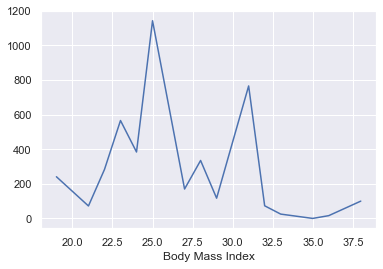

In [103]:
data_bmi_absent.plot(kind="line")

In [101]:
data_children_absent=data.groupby("Children")["Absenteeism Time in Hours"].sum()

<AxesSubplot:xlabel='Children'>

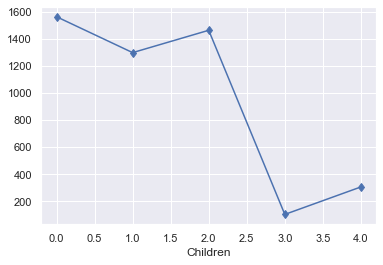

In [116]:
data_children_absent.plot(kind="line",marker="d")

#### no children no pets 

In [111]:
data_no_children_no_pets=data[(data['Children']==0) & (data['Pets']==0)]['Absenteeism Time in Hours'].sum()

In [113]:
data_no_children_no_pets

1547

In [117]:
data['Absenteeism Time in Hours'].sum()

4733

In [123]:
data['ID'].unique()

array([11, 36,  3,  7, 10, 20, 14,  1, 24,  6, 33, 18, 30,  2, 19, 27, 34,
        5, 15, 29, 28, 13, 22, 17, 31, 23, 32,  9, 26, 21,  8, 25, 12, 16],
      dtype=int64)

In [127]:
date_no_duplicate=data.drop_duplicates('ID')

<AxesSubplot:>

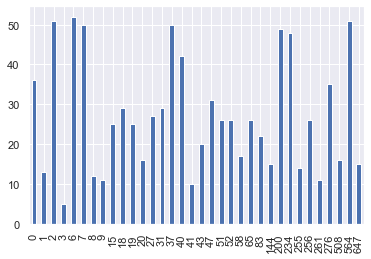

In [130]:
date_no_duplicate['Distance to Work'].plot(kind="bar")

In [144]:
raw_data

ID  Reason for Absence        Date  Transportation Expense  \
0    11                  26  07/07/2015                     289   
1    36                   0  14/07/2015                     118   
2     3                  23  15/07/2015                     179   
3     7                   7  16/07/2015                     279   
4    11                  23  23/07/2015                     289   
5     3                  23  10/07/2015                     179   
6    10                  22  17/07/2015                     361   
7    20                  23  24/07/2015                     260   
8    14                  19  06/07/2015                     155   
9     1                  22  13/07/2015                     235   
10   20                   1  20/07/2015                     260   
11   20                   1  14/07/2015                     260   
12   20                  11  15/07/2015                     260   
13    3                  11  15/07/2015                     179   
14    3                  23  15/07/2015                     179   
15   24                  14  17/07/2015                     246   
16    3                  23  17/07/2015                     179   
17    3                  21  27/07/2015                     179   
18    6                  11  30/07/2015                     189   
19   33                  23  05/08/2015                     248   
20   18                  10  12/08/2015                     330   
21    3                  11  03/08/2015                     179   
22   10                  13  10/08/2015                     361   
23   20                  28  14/08/2015                     260   
24   11                  18  17/08/2015                     289   
25   10                  25  24/08/2015                     361   
26   11                  23  04/08/2015                     289   
27   30                  28  12/08/2015                     157   
28   11                  18  19/08/2015                     289   
29    3                  23  28/08/2015                     179   
30    3                  18  17/08/2015                     179   
31    2                  18  27/08/2015                     235   
32    1                  23  27/08/2015                     235   
33    2                  18  17/08/2015                     235   
34    3                  23  17/08/2015                     179   
35   10                  23  17/08/2015                     361   
36   11                  24  04/08/2015                     289   
37   19                  11  20/08/2015                     291   
38    2                  28  21/08/2015                     235   
39   20                  23  28/08/2015                     260   
40   27                  23  01/09/2015                     184   
41   34                  23  07/09/2015                     118   
42    3                  23  01/09/2015                     179   
43    5                  19  08/09/2015                     235   
44   14                  23  09/09/2015                     155   
45   34                  23  13/09/2015                     118   
46    3                  23  14/09/2015                     179   
47   15                  23  24/09/2015                     291   
48   20                  22  04/09/2015                     260   
49   15                  14  14/09/2015                     291   
50   20                   0  21/09/2015                     260   
51   29                   0  28/09/2015                     225   
52   28                  23  08/09/2015                     225   
53   34                  23  15/09/2015                     118   
54   11                   0  22/09/2015                     289   
55   36                   0  29/09/2015                     118   
56   28                  18  16/09/2015                     225   
57    3                  23  23/09/2015                     179   
58   13                   0  30/09/2015             

In [145]:
data

ID  Reason for Absence       Date  Transportation Expense  \
0    11                  26 2015-07-07                     289   
1    36                   0 2015-07-14                     118   
2     3                  23 2015-07-15                     179   
3     7                   7 2015-07-16                     279   
4    11                  23 2015-07-23                     289   
5     3                  23 2015-10-07                     179   
6    10                  22 2015-07-17                     361   
7    20                  23 2015-07-24                     260   
8    14                  19 2015-06-07                     155   
9     1                  22 2015-07-13                     235   
10   20                   1 2015-07-20                     260   
11   20                   1 2015-07-14                     260   
12   20                  11 2015-07-15                     260   
13    3                  11 2015-07-15                     179   
14    3                  23 2015-07-15                     179   
15   24                  14 2015-07-17                     246   
16    3                  23 2015-07-17                     179   
17    3                  21 2015-07-27                     179   
18    6                  11 2015-07-30                     189   
19   33                  23 2015-05-08                     248   
20   18                  10 2015-12-08                     330   
21    3                  11 2015-03-08                     179   
22   10                  13 2015-10-08                     361   
23   20                  28 2015-08-14                     260   
24   11                  18 2015-08-17                     289   
25   10                  25 2015-08-24                     361   
26   11                  23 2015-04-08                     289   
27   30                  28 2015-12-08                     157   
28   11                  18 2015-08-19                     289   
29    3                  23 2015-08-28                     179   
30    3                  18 2015-08-17                     179   
31    2                  18 2015-08-27                     235   
32    1                  23 2015-08-27                     235   
33    2                  18 2015-08-17                     235   
34    3                  23 2015-08-17                     179   
35   10                  23 2015-08-17                     361   
36   11                  24 2015-04-08                     289   
37   19                  11 2015-08-20                     291   
38    2                  28 2015-08-21                     235   
39   20                  23 2015-08-28                     260   
40   27                  23 2015-01-09                     184   
41   34                  23 2015-07-09                     118   
42    3                  23 2015-01-09                     179   
43    5                  19 2015-08-09                     235   
44   14                  23 2015-09-09                     155   
45   34                  23 2015-09-13                     118   
46    3                  23 2015-09-14                     179   
47   15                  23 2015-09-24                     291   
48   20                  22 2015-04-09                     260   
49   15                  14 2015-09-14                     291   
50   20                   0 2015-09-21                     260   
51   29                   0 2015-09-28                     225   
52   28                  23 2015-08-09                     225   
53   34                  23 2015-09-15                     118   
54   11                   0 2015-09-22                     289   
55   36                   0 2015-09-29                     118   
56   28                  18 2015-09-16                     225   
57    3                  23 2015-09-23                     179   
58   13                   0 2015-09-30                     369   
59   33                  23 2015-11-09       

In [150]:
data

Reason for Absence       Date  Transportation Expense  Distance to Work  \
0                    26 2015-07-07                     289                36   
1                     0 2015-07-14                     118                13   
2                    23 2015-07-15                     179                51   
3                     7 2015-07-16                     279                 5   
4                    23 2015-07-23                     289                36   
5                    23 2015-10-07                     179                51   
6                    22 2015-07-17                     361                52   
7                    23 2015-07-24                     260                50   
8                    19 2015-06-07                     155                12   
9                    22 2015-07-13                     235                11   
10                    1 2015-07-20                     260                50   
11                    1 2015-07-14                     260                50   
12                   11 2015-07-15                     260                50   
13                   11 2015-07-15                     179                51   
14                   23 2015-07-15                     179                51   
15                   14 2015-07-17                     246                25   
16                   23 2015-07-17                     179                51   
17                   21 2015-07-27                     179                51   
18                   11 2015-07-30                     189                29   
19                   23 2015-05-08                     248                25   
20                   10 2015-12-08                     330                16   
21                   11 2015-03-08                     179                51   
22                   13 2015-10-08                     361                52   
23                   28 2015-08-14                     260                50   
24                   18 2015-08-17                     289                36   
25                   25 2015-08-24                     361                52   
26                   23 2015-04-08                     289                36   
27                   28 2015-12-08                     157                27   
28                   18 2015-08-19                     289                36   
29                   23 2015-08-28                     179                51   
30                   18 2015-08-17                     179                51   
31                   18 2015-08-27                     235                29   
32                   23 2015-08-27                     235                11   
33                   18 2015-08-17                     235                29   
34                   23 2015-08-17                     179                51   
35                   23 2015-08-17                     361                52   
36                   24 2015-04-08                     289                36   
37                   11 2015-08-20                     291                50   
38                   28 2015-08-21                     235                29   
39                   23 2015-08-28                     260                50   
40                   23 2015-01-09                     184                42   
41                   23 2015-07-09                     118                10   
42                   23 2015-01-09                     179                51   
43                   19 2015-08-09                     235                20   
44                   23 2015-09-09                     155                12   
45                   23 2015-09-13                     118                10   
46                   23 2015-09-14                     179                51   
47                   23 2015-09-24                     291                31   
48                   22 2015-04-09                     260                50   
49   

In [153]:
reson_absent=data.groupby("Reason for Absence")['Absenteeism Time in Hours'].sum()

<AxesSubplot:xlabel='Reason for Absence', ylabel='Total hours of Absence'>

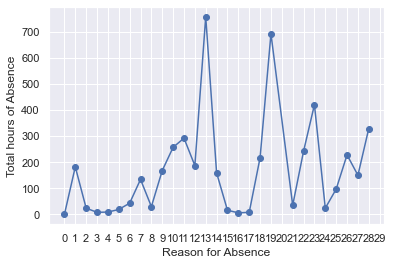

In [157]:
x_axis=np.arange(30)
reson_absent.plot(kind="line",marker="o",xticks=x_axis,ylabel="Total hours of Absence")


In [159]:
data.head()

Reason for Absence       Date  Transportation Expense  Distance to Work  \
0                  26 2015-07-07                     289                36   
1                   0 2015-07-14                     118                13   
2                  23 2015-07-15                     179                51   
3                   7 2015-07-16                     279                 5   
4                  23 2015-07-23                     289                36   

   Age  Daily Work Load Average  Body Mass Index  Education  Children  Pets  \
0   33                  239.554               30          1         2     1   
1   50                  239.554               31          1         1     0   
2   38                  239.554               31          1         0     0   
3   39                  239.554               24          1         2     0   
4   33                  239.554               30          1         2     1   

   Absenteeism Time in Hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2

In [160]:
data['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [195]:
data_with_dumies=pd.get_dummies(data['Reason for Absence'],drop_first=True)

In [196]:
data_with_dumies

1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  \
0     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
7     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
8     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
9     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
10    1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
11    1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
12    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
13    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
14    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
15    0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
16    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
17    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
18    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
19    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
20    0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
21    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
22    0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   
23    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
24    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
25    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
26    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
27    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
28    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
29    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
30    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
31    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
32    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
33    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
34    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
35    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
36    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
37    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
38    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
39    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
40    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
41    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
42    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
43    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
44    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
45    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
46    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
47    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
48    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
49    0   0   0   0   0   0   0   0   0   0   0   0   0

In [197]:
data_with_dumies['check']=data_with_dumies.sum(axis=1)

In [198]:
data_with_dumies

1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  21  \
0    0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
1    0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
2    0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
3    0  0  0  0  0  0  1  0  0   0   0   0   0   0   0   0   0   0   0   0   
4    0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
5    0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
6    0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
7    0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
8    0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   1   0   
9    0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
10   1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
11   1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
12   0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0   0   
13   0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0   0   
14   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
15   0  0  0  0  0  0  0  0  0   0   0   0   0   1   0   0   0   0   0   0   
16   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
17   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   1   
18   0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0   0   
19   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
20   0  0  0  0  0  0  0  0  0   1   0   0   0   0   0   0   0   0   0   0   
21   0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0   0   
22   0  0  0  0  0  0  0  0  0   0   0   0   1   0   0   0   0   0   0   0   
23   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
24   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   
25   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
26   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
27   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
28   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   
29   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
30   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   
31   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   
32   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
33   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0   0   
34   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
35   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
36   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
37   0  0  0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0   0   
38   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
39   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
40   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
41   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
42   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
43   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   1   0   
44   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
45   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
46   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
47   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
48   0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   
49   0  0  0  0  0  0  0  0  0   0   0   0   0   1   0   0   0   0   0   0   
50   0  0  0  0  0  0  0  0

In [199]:
data_with_dumies['check'].sum()

662

In [200]:
len(data_with_dumies)

700

In [201]:
data_with_dumies['check'].unique()

array([1, 0], dtype=int64)

In [202]:
data_with_dumies=data_with_dumies.drop('check',axis=1)

In [203]:
data_with_dumies

1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17  18  \
0     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3     0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   
4     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
5     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
6     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
7     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
8     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
9     0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
10    1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
11    1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
12    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
13    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
14    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
15    0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   
16    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
17    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
18    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
19    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
20    0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   
21    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
22    0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   
23    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
24    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
25    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
26    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
27    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
28    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
29    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
30    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
31    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
32    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
33    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   
34    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
35    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
36    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
37    0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   
38    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
39    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
40    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
41    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
42    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
43    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
44    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
45    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
46    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
47    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
48    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
49    0   0   0   0   0   0   0   0   0   0   0   0   0

In [214]:
reason_group_1=data_with_dumies.loc[:,1:14].max(axis=1)
reason_group_2=data_with_dumies.loc[:,15:17].max(axis=1)
reason_group_3=data_with_dumies.loc[:,18:21].max(axis=1)
reason_group_4=data_with_dumies.loc[:,22:28].max(axis=1)


In [218]:
data.head()

Reason for Absence       Date  Transportation Expense  Distance to Work  \
0                  26 2015-07-07                     289                36   
1                   0 2015-07-14                     118                13   
2                  23 2015-07-15                     179                51   
3                   7 2015-07-16                     279                 5   
4                  23 2015-07-23                     289                36   

   Age  Daily Work Load Average  Body Mass Index  Education  Children  Pets  \
0   33                  239.554               30          1         2     1   
1   50                  239.554               31          1         1     0   
2   38                  239.554               31          1         0     0   
3   39                  239.554               24          1         2     0   
4   33                  239.554               30          1         2     1   

   Absenteeism Time in Hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2

In [224]:
data["group_reason_1"]=reason_group_1
data["group_reason_2"]=reason_group_2
data["group_reason_3"]=reason_group_3
data["group_reason_4"]=reason_group_4

In [233]:
data.columns

Index(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours', 'group_reason_1', 'group_reason_2',
       'group_reason_3', 'group_reason_4'],
      dtype='object')

In [234]:
column_index=['group_reason_1', 'group_reason_2',
       'group_reason_3', 'group_reason_4','Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours',]
df=data[column_index]    

In [235]:
df.head()

group_reason_1  group_reason_2  group_reason_3  group_reason_4       Date  \
0               0               0               0               1 2015-07-07   
1               0               0               0               0 2015-07-14   
2               0               0               0               1 2015-07-15   
3               1               0               0               0 2015-07-16   
4               0               0               0               1 2015-07-23   

   Transportation Expense  Distance to Work  Age  Daily Work Load Average  \
0                     289                36   33                  239.554   
1                     118                13   50                  239.554   
2                     179                51   38                  239.554   
3                     279                 5   39                  239.554   
4                     289                36   33                  239.554   

   Body Mass Index  Education  Children  Pets  Absenteeism Time in Hours  
0               30          1         2     1                          4  
1               31          1         1     0                          0  
2               31          1         0     0                          2  
3               24          1         2     0                          4  
4               30          1         2     1                          2

### Checkpointing

In [236]:
df_check=df.copy()

In [237]:
df_check.head()

group_reason_1  group_reason_2  group_reason_3  group_reason_4       Date  \
0               0               0               0               1 2015-07-07   
1               0               0               0               0 2015-07-14   
2               0               0               0               1 2015-07-15   
3               1               0               0               0 2015-07-16   
4               0               0               0               1 2015-07-23   

   Transportation Expense  Distance to Work  Age  Daily Work Load Average  \
0                     289                36   33                  239.554   
1                     118                13   50                  239.554   
2                     179                51   38                  239.554   
3                     279                 5   39                  239.554   
4                     289                36   33                  239.554   

   Body Mass Index  Education  Children  Pets  Absenteeism Time in Hours  
0               30          1         2     1                          4  
1               31          1         1     0                          0  
2               31          1         0     0                          2  
3               24          1         2     0                          4  
4               30          1         2     1                          2

In [251]:
def data_to_month(data_ele):
    return data_ele.month

In [252]:
df_check['Month']=df_check['Date'].apply(data_to_month)

In [255]:
def date_to_weekday(date_ele):
    return date_ele.weekday()

In [258]:
df_check['Weekday']=df_check['Date'].apply(date_to_weekday)

In [259]:
df_check

group_reason_1  group_reason_2  group_reason_3  group_reason_4  \
0                 0               0               0               1   
1                 0               0               0               0   
2                 0               0               0               1   
3                 1               0               0               0   
4                 0               0               0               1   
5                 0               0               0               1   
6                 0               0               0               1   
7                 0               0               0               1   
8                 0               0               1               0   
9                 0               0               0               1   
10                1               0               0               0   
11                1               0               0               0   
12                1               0               0               0   
13                1               0               0               0   
14                0               0               0               1   
15                1               0               0               0   
16                0               0               0               1   
17                0               0               1               0   
18                1               0               0               0   
19                0               0               0               1   
20                1               0               0               0   
21                1               0               0               0   
22                1               0               0               0   
23                0               0               0               1   
24                0               0               1               0   
25                0               0               0               1   
26                0               0               0               1   
27                0               0               0               1   
28                0               0               1               0   
29                0               0               0               1   
30                0               0               1               0   
31                0               0               1               0   
32                0               0               0               1   
33                0               0               1               0   
34                0               0               0               1   
35                0               0               0               1   
36                0               0               0               1   
37                1               0               0               0   
38                0               0               0               1   
39                0               0               0               1   
40                0               0               0               1   
41                0               0               0               1   
42                0               0               0               1   
43                0               0               1               0   
44                0               0               0               1   
45                0               0               0               1   
46                0               0               0               1   
47                0               0               0               1   
48                0               0               0               1   
49                1               0               0               0   
50                0               0               0               0   
51                0               0               0               0   
52                0               0               0               1   
53                0               0               0               1   
54                0               0               0               0   
55                0          

In [260]:
df_check.columns

Index(['group_reason_1', 'group_reason_2', 'group_reason_3', 'group_reason_4',
       'Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours', 'Month', 'Weekday'],
      dtype='object')

In [261]:
columns_name=['group_reason_1', 'group_reason_2', 'group_reason_3', 'group_reason_4', 'Month', 'Weekday',
       'Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours']

In [263]:
df_check=df_check[columns_name]

In [264]:
df_check.head()

group_reason_1  group_reason_2  group_reason_3  group_reason_4  Month  \
0               0               0               0               1      7   
1               0               0               0               0      7   
2               0               0               0               1      7   
3               1               0               0               0      7   
4               0               0               0               1      7   

   Weekday       Date  Transportation Expense  Distance to Work  Age  \
0        1 2015-07-07                     289                36   33   
1        1 2015-07-14                     118                13   50   
2        2 2015-07-15                     179                51   38   
3        3 2015-07-16                     279                 5   39   
4        3 2015-07-23                     289                36   33   

   Daily Work Load Average  Body Mass Index  Education  Children  Pets  \
0                  239.554               30          1         2     1   
1                  239.554               31          1         1     0   
2                  239.554               31          1         0     0   
3                  239.554               24          1         2     0   
4                  239.554               30          1         2     1   

   Absenteeism Time in Hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2

In [265]:
df_check=df_check.drop("Date",axis=1)

In [266]:
df_check['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

In [269]:
df_check['Education']=df_check['Education'].map({1:0,2:1,3:1,4:1})

In [275]:
df_check

group_reason_1  group_reason_2  group_reason_3  group_reason_4  Month  \
0                 0               0               0               1      7   
1                 0               0               0               0      7   
2                 0               0               0               1      7   
3                 1               0               0               0      7   
4                 0               0               0               1      7   
5                 0               0               0               1     10   
6                 0               0               0               1      7   
7                 0               0               0               1      7   
8                 0               0               1               0      6   
9                 0               0               0               1      7   
10                1               0               0               0      7   
11                1               0               0               0      7   
12                1               0               0               0      7   
13                1               0               0               0      7   
14                0               0               0               1      7   
15                1               0               0               0      7   
16                0               0               0               1      7   
17                0               0               1               0      7   
18                1               0               0               0      7   
19                0               0               0               1      5   
20                1               0               0               0     12   
21                1               0               0               0      3   
22                1               0               0               0     10   
23                0               0               0               1      8   
24                0               0               1               0      8   
25                0               0               0               1      8   
26                0               0               0               1      4   
27                0               0               0               1     12   
28                0               0               1               0      8   
29                0               0               0               1      8   
30                0               0               1               0      8   
31                0               0               1               0      8   
32                0               0               0               1      8   
33                0               0               1               0      8   
34                0               0               0               1      8   
35                0               0               0               1      8   
36                0               0               0               1      4   
37                1               0               0               0      8   
38                0               0               0               1      8   
39                0               0               0               1      8   
40                0               0               0               1      1   
41                0               0               0               1      7   
42                0               0               0               1      1   
43                0               0               1               0      8   
44                0               0               0               1      9   
45                0               0               0               1      9   
46                0               0               0               1      9   
47                0               0               0               1      9   
48                0               0               0               1      4   
49                1               0               0               0      9   
50                0        

### checkpointing and saving data

In [276]:
df_preprocessed=df_check.copy()

In [279]:
df_preprocessed.to_csv("df_preprocessed_new.csv",index=False)